# Lab 4: Automatic Differ..
Sean Wade

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import cPickle
import seaborn
import autograd.numpy as np
import autograd
import numpy as npo

In [29]:
from __future__ import division

In [30]:
%matplotlib inline

In [31]:
with open('cifar-10-batches-py/data_batch_1') as load:
    data = cPickle.load(load)

features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T

N = 1000 # Number of features
D = 10   # Number of labes
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

In [32]:
data = np.vstack((features.T, np.ones(N)))
W = np.random.normal(0,.5,(10, features.shape[0]))

## Score Function
The score function is how we encode how close our results are to the desired results.

In [33]:
def score_func(W):
    return np.dot(W, data)

## Loss Function
The loss function is a way to quantify our unhappiness with the scores across the training data.

In [34]:
def loss_func(W):
    ''' 
    The softmax loss function.
    Args:
      W : The weight matrix.
    Returns:
      loss (float) : The loss as a scalar
    '''
    scores = score_func(W)
    prob = np.exp(scores) / np.sum( np.exp(scores), axis=0)
    losses = prob[labels.flatten(), range(0,prob.shape[1])]
    results = -1 * np.log(losses)
    return np.mean(results)

## Numerical Gradient
The gradient is used to find the steepest direction given any point of a function. This is used in our optimization of the loss function. This approach is a very simple and naive method.

In [35]:
auto_grad = autograd.grad(loss_func)

def automatic_gradiant(W):
    return loss_func(W), auto_grad(W)

In [36]:
W = np.random.normal(0,.5,(10, features.shape[1]+1))
epochs = 1000
step_size = .04
loss_arr = []
accuracy_arr = []

for i in xrange(epochs):
    loss, gradiant = automatic_gradiant(W)
    W = W - step_size * gradiant
    all_score = score_func(W)
    cat = np.argmax(all_score, axis=0)
    accuracy_arr.append(float(np.sum(np.isclose(labels.flatten(), cat))) / len(labels.flatten()))
    loss_arr.append(loss)

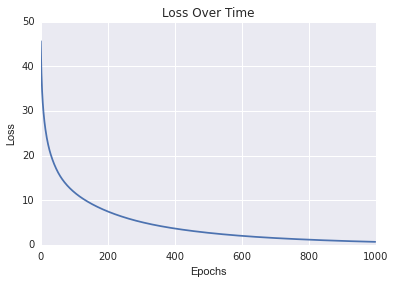

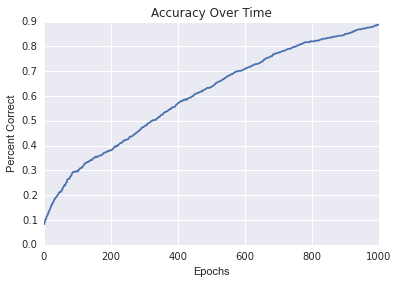

In [37]:
# Plot results
x = np.arange(epochs)
plt.title('Loss Over Time')
plt.plot(x, loss_arr)
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.show()
plt.title('Accuracy Over Time')
plt.plot(x, accuracy_arr)
plt.xlabel('Epochs'); plt.ylabel('Percent Correct')
plt.show()